<a href="https://colab.research.google.com/github/bryanzheng2222/Banking-data-project/blob/main/Banking%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
pip install pandas_datareader

In [64]:
import pandas as pd
import os
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

In [65]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [66]:
base_dir = './drive/MyDrive/Colab Notebooks/Finance_banking_project'

In [67]:
banking = pd.read_pickle(os.path.join(base_dir, "all_banks"))

In [68]:
start = datetime.datetime (2006,1,1)
end = datetime.datetime (2016,1,1)

In [69]:
banking.head()

Bank Ticker    BAC                       ...    WFC                        
Stock Info    Open   High    Low  Close  ...   High    Low  Close    Volume
Date                                     ...                               
2006-01-03   46.92  47.18  46.15  47.08  ...  31.98  31.20  31.90  11016400
2006-01-04   47.00  47.24  46.45  46.58  ...  31.82  31.36  31.53  10871000
2006-01-05   46.58  46.83  46.32  46.64  ...  31.56  31.31  31.50  10158000
2006-01-06   46.80  46.91  46.35  46.57  ...  31.78  31.38  31.68   8403800
2006-01-09   46.72  46.97  46.36  46.60  ...  31.82  31.56  31.68   5619600

[5 rows x 30 columns]

In [70]:
banking.describe()

Bank Ticker          BAC               ...          WFC              
Stock Info          Open         High  ...        Close        Volume
count        2517.000000  2517.000000  ...  2517.000000  2.517000e+03
mean           22.205217    22.479182  ...    35.598411  3.293280e+07
std            15.308041    15.406193  ...    10.012581  3.572992e+07
min             3.220000     3.510000  ...     8.120000  2.392000e+06
25%            12.310000    12.450000  ...    28.490000  1.381537e+07
50%            15.780000    15.970000  ...    33.500000  2.317952e+07
75%            32.730000    33.600000  ...    41.220000  3.796472e+07
max            55.040000    55.080000  ...    58.520000  4.787366e+08

[8 rows x 30 columns]

In [71]:
banking.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-01-03 to 2015-12-31
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (BAC, Open)    2517 non-null   float64
 1   (BAC, High)    2517 non-null   float64
 2   (BAC, Low)     2517 non-null   float64
 3   (BAC, Close)   2517 non-null   float64
 4   (BAC, Volume)  2517 non-null   int64  
 5   (C, Open)      2517 non-null   float64
 6   (C, High)      2517 non-null   float64
 7   (C, Low)       2517 non-null   float64
 8   (C, Close)     2517 non-null   float64
 9   (C, Volume)    2517 non-null   int64  
 10  (GS, Open)     2517 non-null   float64
 11  (GS, High)     2517 non-null   float64
 12  (GS, Low)      2517 non-null   float64
 13  (GS, Close)    2517 non-null   float64
 14  (GS, Volume)   2517 non-null   int64  
 15  (JPM, Open)    2517 non-null   float64
 16  (JPM, High)    2517 non-null   float64
 17  (JPM, Low)     2517 non-null   flo

In [72]:
banking['BAC']['Close']

Date
2006-01-03    47.08
2006-01-04    46.58
2006-01-05    46.64
2006-01-06    46.57
2006-01-09    46.60
              ...  
2015-12-24    17.27
2015-12-28    17.13
2015-12-29    17.28
2015-12-30    17.05
2015-12-31    16.83
Name: Close, Length: 2517, dtype: float64

In [73]:
banking['BAC']['Close'].max()

54.9

In [74]:
for tick in tickers:
  print (tick, banking[tick]['Close'].max())

BAC 54.9
C 564.1
GS 247.92
JPM 70.08
MS 89.3
WFC 58.52


In [75]:
banking.xs (key = 'Close', axis = 1, level = 'Stock Info')

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.08,492.90,128.87,40.19,58.31,31.90
2006-01-04,46.58,483.80,127.09,39.62,58.35,31.53
2006-01-05,46.64,486.20,127.04,39.74,58.51,31.50
2006-01-06,46.57,486.20,128.84,40.02,58.57,31.68
2006-01-09,46.60,483.90,130.39,40.67,59.19,31.68
...,...,...,...,...,...,...
2015-12-24,17.27,52.71,182.47,66.60,32.48,54.82
2015-12-28,17.13,52.38,181.62,66.38,32.17,54.68
2015-12-29,17.28,52.98,183.53,67.07,32.55,55.29


In [76]:
returns = pd.DataFrame()

In [77]:
for tick in tickers:
  returns [tick+'Return'] = banking[tick]['Close'].pct_change()

In [78]:
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


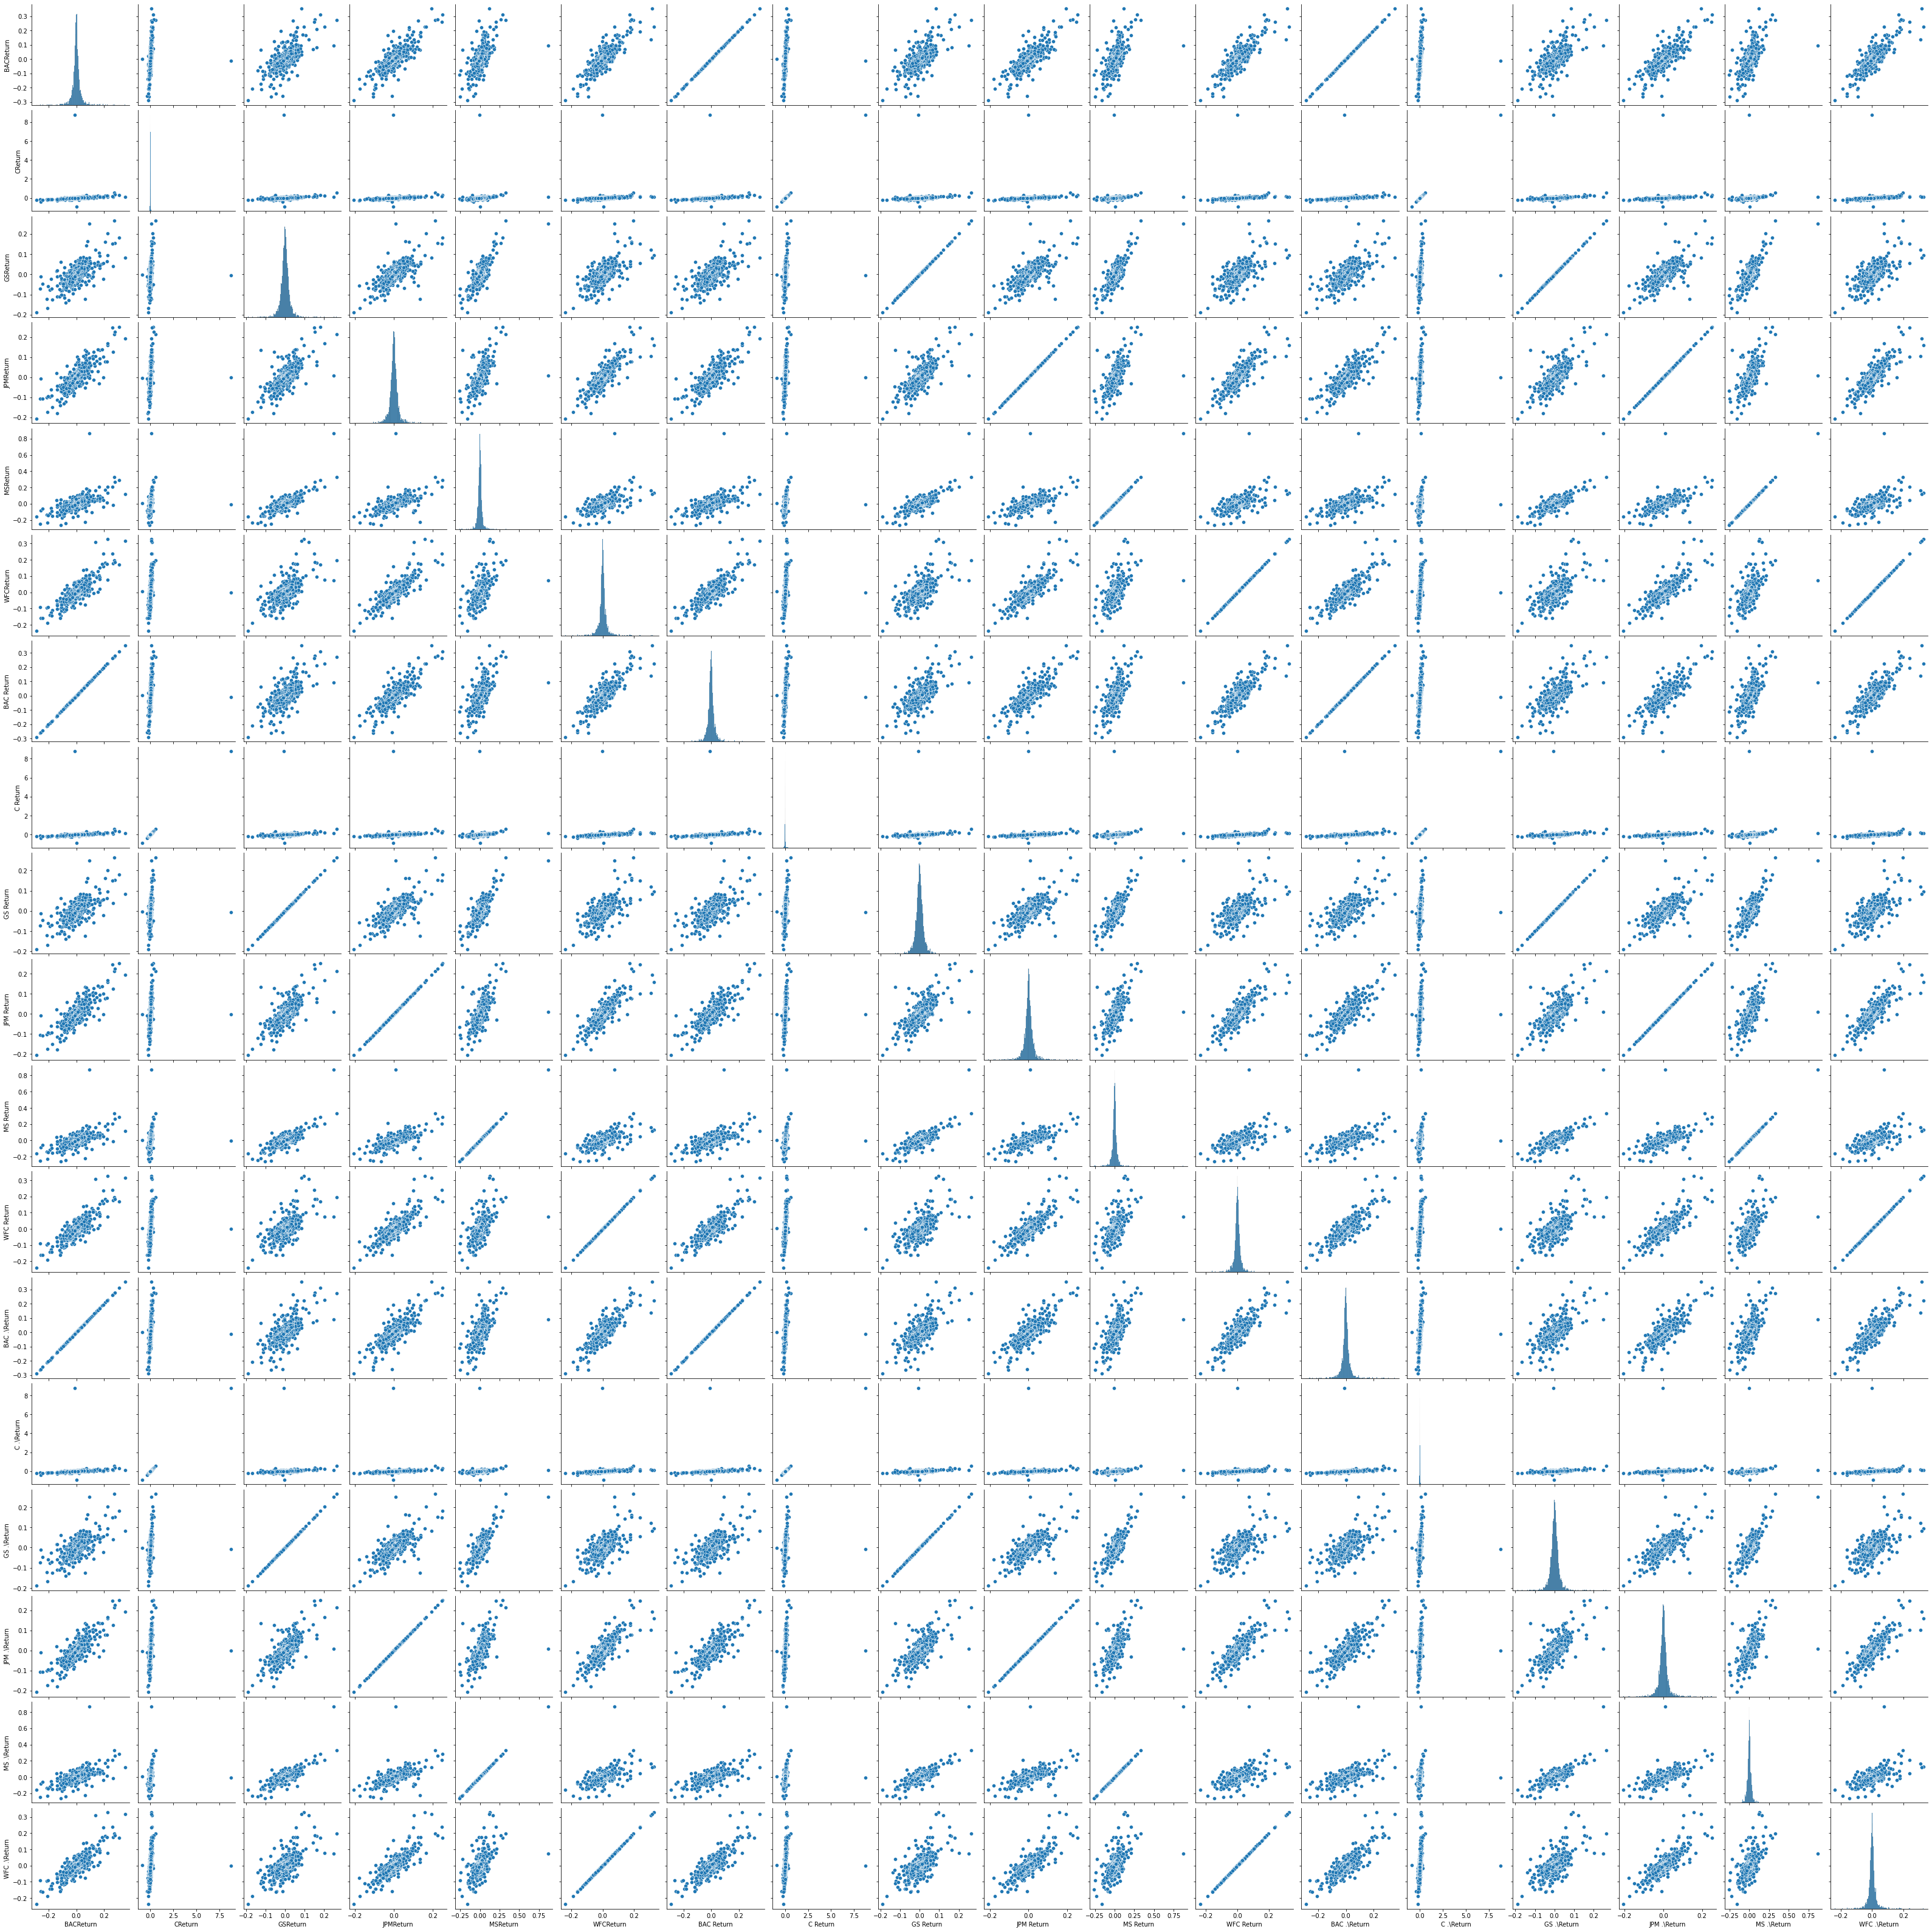

In [62]:
sns.pairplot(returns[1:])

In [80]:
returns.min()

BACReturn   -0.289694
CReturn     -0.899107
GSReturn    -0.189596
JPMReturn   -0.207274
MSReturn    -0.258929
WFCReturn   -0.238223
dtype: float64

In [82]:
returns['BACReturn'].argmin()

766

In [83]:
returns.idxmin()

BACReturn   2009-01-20
CReturn     2011-05-06
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]

In [84]:
returns.idxmax()

BACReturn   2009-04-09
CReturn     2011-05-09
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFCReturn   2008-07-16
dtype: datetime64[ns]

In [85]:
returns.std()

BACReturn    0.036650
CReturn      0.179969
GSReturn     0.025346
JPMReturn    0.027656
MSReturn     0.037820
WFCReturn    0.030233
dtype: float64

In [89]:
returns.loc['2015-01-01':'2015-12-31'].std()

BACReturn    0.016163
CReturn      0.015289
GSReturn     0.014046
JPMReturn    0.014017
MSReturn     0.016249
WFCReturn    0.012591
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


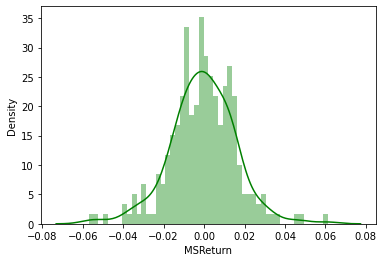

In [91]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MSReturn'], color = 'green', bins = 50)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


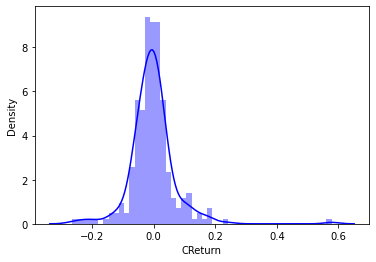

In [96]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['CReturn'],color = 'blue', bins = 50)

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import plotly
import cufflinks as cf
cf.go_offline ()

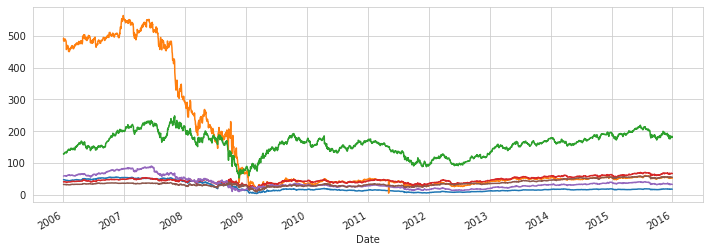

In [103]:
for tick in tickers:
  banking[tick]['Close'].plot(label=tick, figsize = (12,4))

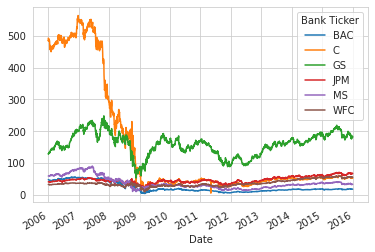

In [106]:
banking.xs(key='Close',axis = 1, level = 'Stock Info').plot()

In [121]:
df1 = banking.xs(key='Close',axis = 1, level = 'Stock Info')